<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN

---

Below you will practice KNN classification on a dataset of .

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



pd.set_option('max_columns', 99)

### 1. Load the data

In [25]:
# web location:
file_path = '../data/averages.csv'
congress = pd.read_csv(file_path)



In [26]:
# looking at the first rows 
congress.head(15)

,congress,chamber,bioguide,last_name,state,district,party,votes,agree_pct,predicted_agree,net_trump_vote
0,0,house,A000055,Aderholt,AL,4.0,Republican,156.0,0.974359,0.958389,63.0
1,115,house,A000055,Aderholt,AL,4.0,R,95.0,0.968421,0.946349,63.0
2,116,house,A000055,Aderholt,AL,4.0,R,61.0,0.983607,0.977141,63.0
3,0,house,A000367,Amash,MI,3.0,Independent,155.0,0.625806,0.762262,9.4
4,115,house,A000367,Amash,MI,3.0,R,96.0,0.541667,0.847386,9.4
5,116,house,A000367,Amash,MI,3.0,I,57.0,0.754386,0.656858,9.4
6,116,house,A000367,Amash,MI,3.0,R,2.0,1.000000,0.595826,9.4
7,0,house,A000369,Amodei,NV,2.0,Republican,155.0,0.974194,0.813618,12.3
8,115,house,A000369,Amodei,NV,2.0,R,94.0,0.989362,0.876527,12.3
9,116,house,A000369,Amodei,NV,2.0,R,61.0,0.950820,0.716675,12.3


### 2. Looks like the party column needs some munging - let's: 
    A) Drop the row with a null value in `last_name`
    B) Shorten the longer strings in the party columns i.e. change `Republican` to `R`

In [27]:
### Drop row with null last name 
congress.loc[congress['last_name'].isnull()]

,congress,chamber,bioguide,last_name,state,district,party,votes,agree_pct,predicted_agree,net_trump_vote
1738,116,NaN,V000133,NaN,NaN,NaN,D,NaN,NaN,0.395036,NaN


In [28]:
congress = congress.dropna(subset=['last_name'])

In [29]:
### Clean target column
congress.loc[:, 'party'] = congress['party'].map(lambda cell: cell[0])

### 3. We are going to be predicting `party` using `agree_pct` and `net_trump_vote` as our X variables. What is the baseline accuracy?

In [30]:
#baseline accuracy is the proportion of the data that is in the most frequent class 

congress['party'].value_counts(normalize=True)


R    0.516110
D    0.479287
I    0.004603
Name: party, dtype: float64

### 4. Set up our X and y and perform a train-test-split

In [31]:
congress = congress.loc[congress['congress'] ==0]
X = congress[['agree_pct', 'net_trump_vote']]
y = congress['party']

In [32]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=32)

### 5. Scale your data

In [33]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### 6. Let's visualize this - the black stars are the values in the test set 

Set a random state of 32

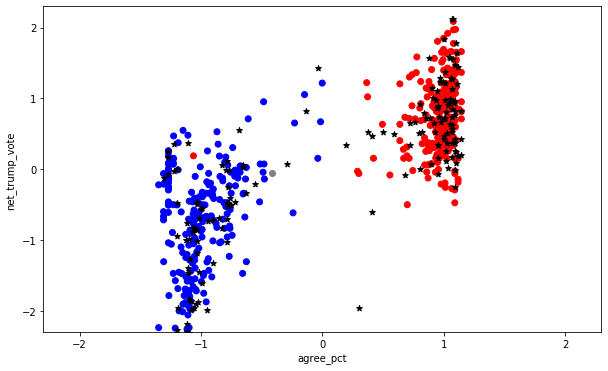

In [34]:
#plotting trick - map colors to values 
color_dict = {'D':'blue', 'I':'grey', 'R':'red'}

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(X_train_sc[:,0], X_train_sc[:,1], c=y_train.map(color_dict))
ax.scatter(X_test_sc[:,0], X_test_sc[:, 1], color = 'black', marker='*')
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_ybound(-2.3, 2.3)
ax.set_xbound(-2.3, 2.3);

### 6. Fit a `KNeighborsClassifier` with k=5
Evauluate your performance on train and test

In [35]:
## code 

knn5 = KNeighborsClassifier(n_neighbors=5)

knn5.fit(X_train_sc, y_train)
knn5.score(X_train_sc, y_train)

0.9938271604938271

In [36]:
### fit and score on both train and test 
knn5.score(X_test_sc, y_test)

0.9876543209876543

In [37]:
### save predictions 
y_test_pred = knn5.predict(X_test_sc)

### Teaser - Confusion Matrix 

In [38]:
def make_pretty_conmat(predictions, true_values, classes):
    print(f'Accuracy score: {round(accuracy_score(true_values, predictions), 4)}')
    cols = 'Predicted ' + classes
    indices = 'Actual ' + classes
    conmat = confusion_matrix(y_test, y_test_pred, labels=classes)
    display(pd.DataFrame(conmat, columns=cols, index=indices))
    

In [39]:
make_pretty_conmat(y_test_pred, y_test, knn5.classes_)

Accuracy score: 0.9877


,Predicted D,Predicted I,Predicted R
Actual D,70,0,0
Actual I,0,0,1
Actual R,1,0,90


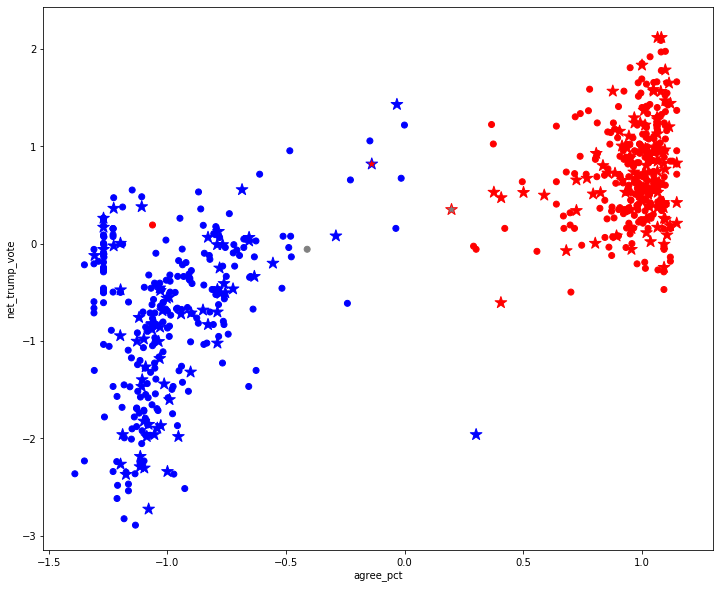

In [40]:
# plotting trick - map colors to values 
color_dict = {'D':'blue', 'I':'grey', 'R':'red'}

fig, ax = plt.subplots(figsize=(12,10))

ax.scatter(X_train_sc[:,0], X_train_sc[:,1], c=y_train.map(color_dict))
ax.scatter(X_test_sc[:,0], X_test_sc[:, 1], color = [color_dict[pred] for pred in y_test_pred], marker='*', \
          facecolors=[color_dict[party] for party in y_test], s=150)
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1]);

### 7. Fit a `KNeighborsClassifier` with k=1
Evauluate your performance on train and test

In [43]:
knn1 = KNeighborsClassifier(n_neighbors=1) # n_neighbors is 1st argument so technically
                                           # we don't need to specify it as a kwarg
                                           # Always use an odd number
knn1.fit(X_train_sc, y_train)

knn1.score(X_train_sc, y_train)

1.0

In [45]:
### can we turn our code from before into a function?
knn1.score(X_test_sc, y_test)

0.9629629629629629

In [52]:
def make_pretty_conmat(predictions, true_values, classes):
    print(f'Accuracy score: {round(accuracy_score(true_values, predictions), 4)}')
    cols = 'Predicted ' + classes
    indices = 'Actual ' + classes
    conmat = confusion_matrix(true_values, predictions, labels=classes)
    display(pd.DataFrame(conmat, columns=cols, index=indices))
    #  corrected from   conmat = confusion_matrix(y_test, y_test_pred, labels=classes)

def map_knn_model(k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_sc, y_train)
    y_test_pred = model.predict(X_test_sc)
    make_pretty_conmat(y_test_pred, y_test, model.classes_)
    # plotting trick - map colors to values 
    color_dict = {'D':'blue', 'I':'grey', 'R':'red'}
    fig, ax = plt.subplots(figsize=(12,10))
    ax.scatter(X_train_sc[:,0], X_train_sc[:,1], c=y_train.map(color_dict))
    ax.scatter(X_test_sc[:,0], X_test_sc[:, 1], color = [color_dict[pred] for pred in y_test_pred], marker='*', \
              facecolors=[color_dict[party] for party in y_test], s=150)
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1]);

# Eventually look into hyper parameter tuning

# Look into modifying this code to work for Linear Regression

### 8. Fit a `KNeighborsClassifier` with k= number of observations in your training set (why is this the max)?
Evauluate your performance on train and test

In [50]:
#code. Every prediction will be the same, which will be whatever has the majority of observations
# This example will have zero variance because every prediction is the same

### 9. Manual parameter tuning - loop through all values of K and evaluate the model on your test set - plot your results 

might need to take steps of 5 for speed

In [49]:
map_knn_model(np.linspace(1,9,4))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [20]:
# A:
